# OpenCV Handson

In [14]:
import cv2    
import sys

# Read and Display an Image

In [15]:
img = cv2.imread('lion.png',-1)  # 1 states orinal image, 0 states grayscale image, -1 states orinal image with Alpha channel
cv2.imshow('Input',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Matplotlib in OpenCV

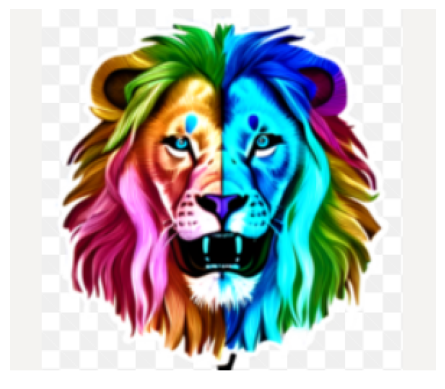

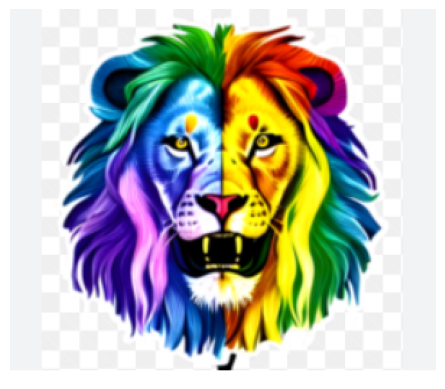

In [1]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('lion.png')
cv2.imshow('Input',img)         #cv2.imshow() has two arguments 

plt.imshow(img)           #plt.imshow() has only one argument
plt.axis('off')
plt.show()

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

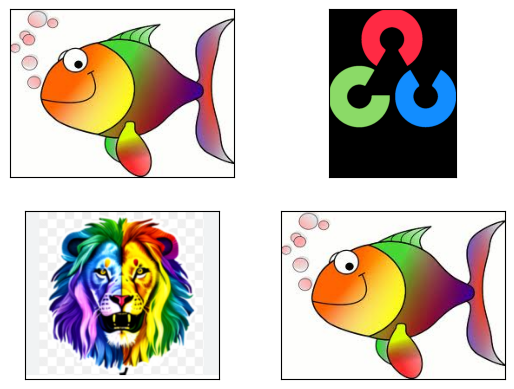

In [2]:
import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('HappyFish.jpg')
img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

img2 = cv2.imread('opencv-logo.png')
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

img3 = cv2.imread('lion.png')
img3 = cv2.cvtColor(img3,cv2.COLOR_BGR2RGB)

img1a = cv2.imread('HappyFish.jpg')
img1a = cv2.cvtColor(img1a,cv2.COLOR_BGR2RGB)

images = [img1, img2, img3, img1a]
for i in range(len(images)):
    plt.subplot(2,2, i+1)
    plt.xticks([])   
    plt.yticks([]) 
    plt.imshow(images[i])

plt.show()



# Covert an Image into Grayscale, Draw, PutText & Save.

In [6]:
img = cv2.imread('lion.png')

if img is None:                                 
    sys.exit('Unable read the image')             # it exits from read image, if there is no image
    
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
#Draw line, rectangle, solid rectangle, circle and ellipse
cv2.line(gray,(0,255),(255,0),(0,255,255),2)
cv2.line(gray,(0,0),(255,255),(0,255,255),2)      
cv2.rectangle(gray,(50,255),(220,180),(150,200,0),-5)  #cv2.rectangle(image, start_coordinates,  end_coordinates, radious, color, thickness) (255,255)-is the center of any image
cv2.rectangle(gray,(80,60),(220,150),(0,255,255),2)
cv2.circle(gray,(132,232),30,(200,200,0),4)                #cv2.circle(image, center_coordinates, radious, color, thickness)
cv2.ellipse(gray,(145,95),(30, 20),0,0,360,(0,255,255),1) #cv2.ellipse(image, center_coordinates, axesLength, angle, startAngle, endAngle, color, thickness)

font=cv2.FONT_HERSHEY_DUPLEX
cv2.putText(gray, 'lion', (50,255), font,3, (0,0,255), 3)

cv2.imshow('lion-grey',gray)
k = cv2.waitKey(0)

if k == ord("s"):
    cv2.imwrite("lion1.jpg", img)   # To save the pre-processed image by 's' key press

cv2.destroyAllWindows()

# Mouse Events - Get (x,y) Coordinates by Mouse Click on an image

In [7]:
img = cv2.imread('lion.png',1)


def click_mouse_events(event, a,b, flags, params):
    font=cv2.FONT_HERSHEY_SIMPLEX
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.putText(img, str(a)+','+str(b), (a,b), font,1, (0,0,255), 3)
        cv2.imshow('Sample',img)


cv2.imshow('Sample',img)
cv2.setMouseCallback('Sample', click_mouse_events)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Image Resizing & ROI - Region of Interest

In [8]:
import cv2

def get_coordinates(event, x, y, flags, params):
    font = cv2.FONT_HERSHEY_DUPLEX
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.putText(img, str(x) + ',' + str(y), (x, y), font, 1, (255, 0, 0), 2)
        cv2.imshow('image', img)

# Load and resize the image
img = cv2.imread('lion.png', 1)
img = cv2.resize(img, (512, 512))

# Extract ROI 
roi = img[127:250, 43:87]           # Extraction or selection of ROI
img[300:423, 383:427] = roi         # Replacement of that ROI by another Region

# Display the image
font=cv2.FONT_HERSHEY_DUPLEX
cv2.putText(img, 'ROI', (390,470), font,2, (0,0,255), 2)
cv2.imshow('image', img)

# Set mouse callback function
cv2.setMouseCallback('image', get_coordinates)

# Wait for a key press
cv2.waitKey(0)
cv2.destroyAllWindows()

# R,G,B Color Combinations Using Trackbar

In [6]:
import cv2
import numpy as np

img = np.zeros((512,512,3),np.uint8)

def passfunction(self):
    pass

cv2.namedWindow('trackbar')

cv2.createTrackbar('R', 'trackbar', 0,255, passfunction)
cv2.createTrackbar('G', 'trackbar', 0,255, passfunction)
cv2.createTrackbar('B', 'trackbar', 0,255, passfunction)

while True:
    cv2.imshow('Image',img)
    button = cv2.waitKey(1) & 0xff
    if button == ord('q'):                      # press 'q' for quit *
        break
           
    b=cv2.getTrackbarPos('B', 'trackbar')
    g=cv2.getTrackbarPos('G', 'trackbar')
    r=cv2.getTrackbarPos('R', 'trackbar')
    img[:] = [b,g,r]
    
cv2.waitKey(0)
cv2.destroyAllWindows()

# Thresholding on Image

In [7]:
import cv2

img = cv2.imread('gradient.png')


_, tresh_binary = cv2.threshold(img, 150,255, cv2.THRESH_BINARY)
_, tresh_binary_inverse = cv2.threshold(img, 150,255, cv2.THRESH_BINARY_INV)
_, tresh_trunc = cv2.threshold(img, 79,255, cv2.THRESH_TRUNC)
_, tresh_tozero = cv2.threshold(img, 79,255, cv2.THRESH_TOZERO)
_, tresh_tozero_inverse = cv2.threshold(img, 79,255, cv2.THRESH_TOZERO_INV)
      

cv2.imshow('Input_Image',img)

cv2.imshow('Thresh_Binary',tresh_binary)
cv2.imshow('Thresh_Binary_Inverse',tresh_binary_inverse)
cv2.imshow('Thresh_TrunK',tresh_trunc)
cv2.imshow('Thresh_Tozero',tresh_trunc)
cv2.imshow('Thresh_Tozero_Inverse',tresh_trunc)


cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import cv2

img = cv2.imread('gradient_rotated.png')


_, tresh_binary = cv2.threshold(img, 150,255, cv2.THRESH_BINARY)
_, tresh_binary_inverse = cv2.threshold(img, 150,255, cv2.THRESH_BINARY_INV)
_, tresh_trunc = cv2.threshold(img, 79,255, cv2.THRESH_TRUNC)
_, tresh_tozero = cv2.threshold(img, 79,255, cv2.THRESH_TOZERO)
_, tresh_tozero_inverse = cv2.threshold(img, 79,255, cv2.THRESH_TOZERO_INV)
      

cv2.imshow('Input_Image',img)

cv2.imshow('Thresh_Binary',tresh_binary)
cv2.imshow('Thresh_Binary_Inverse',tresh_binary_inverse)
cv2.imshow('Thresh_TrunK',tresh_trunc)
cv2.imshow('Thresh_Tozero',tresh_trunc)
cv2.imshow('Thresh_Tozero_Inverse',tresh_trunc)


cv2.waitKey(0)
cv2.destroyAllWindows()


# Adaptive Thresholding on Image

In [8]:
import cv2

img = cv2.imread('gradient_rotated.png',0)

#adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,13,2)
adaptive_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11,2);

cv2.imshow('Original',img)

cv2.imshow('Adaptive_Threshold',adaptive_threshold)


cv2.waitKey(0)
cv2.destroyAllWindows()


# Morphalogical Transformations
### (erosion, dilation, opening, closing, gradient(dilation - erosion), tophat, blackhat )

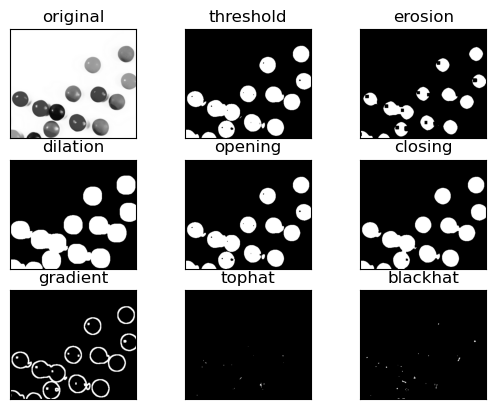

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('smarties.png',0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#kernel = np.array((5,5), np.uint8)
kernel = np.ones((5,5), np.uint8)

_, threshold = cv2.threshold(img, 200,255, cv2.THRESH_BINARY_INV)

erosion = cv2.erode(threshold, kernel, iterations=2)
dilation = cv2.dilate(threshold, kernel, iterations=2)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(threshold, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(threshold, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(threshold, cv2.MORPH_BLACKHAT, kernel)

titles = ['original', 'threshold', 'erosion', 'dilation', 'opening', 'closing', 'gradient', 'tophat', 'blackhat']
images = [img, threshold, erosion, dilation, opening, closing, gradient, tophat, blackhat]
for i in range(0,len(images)):
    plt.subplot(3,3, i+1)
    plt.xticks([])   
    plt.yticks([])
    plt.imshow(images[i])
    plt.title(titles[i])

plt.show()


# Bitwise Operations (AND, OR, NOT and XOR)

In [10]:
import cv2
import numpy as np

img1 = np.zeros((512,512,3), np.uint8)
img2 = np.zeros((512,512,3), np.uint8)

img2 = cv2.rectangle(img2, (256,0), (512,512), (255,255,255), -1)

bit_and_result = cv2.bitwise_and(img1, img2)
bit_or_result = cv2.bitwise_or(img1, img2)
bit_not_result = cv2.bitwise_not(img1)
bit_xor_result = cv2.bitwise_xor(img2, img1)

cv2.imshow('image1', img1)
cv2.imshow('image2', img2)
cv2.imshow('result', bit_xor_result)

cv2.waitKey(0)
cv2.destroyAllWindows()

# hsn-(hue, saturation, value)
### hue = color, saturation = greyness and value = brightness of the pixels

In [5]:
import cv2
import numpy as np

def passfunction(self):
    pass

cv2.namedWindow('tracking')
cv2.createTrackbar('LH', 'tracking', 0,255, passfunction)
cv2.createTrackbar('UH', 'tracking', 255,255, passfunction)
cv2.createTrackbar('LS', 'tracking', 0,255, passfunction)
cv2.createTrackbar('US', 'tracking', 255,255, passfunction)
cv2.createTrackbar('LV', 'tracking', 0,255, passfunction)
cv2.createTrackbar('UV', 'tracking', 255,255, passfunction)

while True:
    frame = cv2.imread('hsv.png',1)
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
           
    lh=cv2.getTrackbarPos('LH', 'tracking')
    uh=cv2.getTrackbarPos('UH', 'tracking')
    ls=cv2.getTrackbarPos('LS', 'tracking')
    us=cv2.getTrackbarPos('US', 'tracking')
    lv=cv2.getTrackbarPos('LV', 'tracking')
    uv=cv2.getTrackbarPos('UV', 'tracking')
    
    lower_region = np.array([lh,ls,lv])
    upper_region = np.array([uh,us,uv])
    
    mask = cv2.inRange(hsv, lower_region, upper_region)
    res = cv2.bitwise_and(frame, frame, mask=mask)
    
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)
    
    button = cv2.waitKey(1) & 0xff
    if button == ord('q'):
        break
        
cv2.destroyAllWindows()

# Canny Edge Detection

In [1]:
import cv2
img = cv2.imread('face.jpg',0)

canny = cv2.Canny(img,100,100)

cv2.imshow('image',img)
cv2.imshow('Canny',canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Filters - HPF & LPF

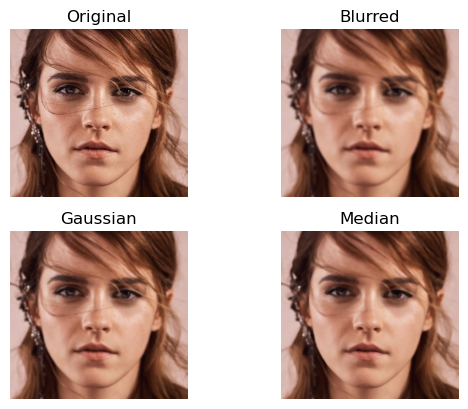

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('face.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

blurred = cv2.blur(img, (5, 5))
gaussian = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)

titles = ['Original', 'Blurred', 'Gaussian', 'Median']

images = [img,  blurred, gaussian, median]

for i in range(len(titles)):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.axis('off')
    plt.imshow(images[i])
plt.show()

# Image Gradients

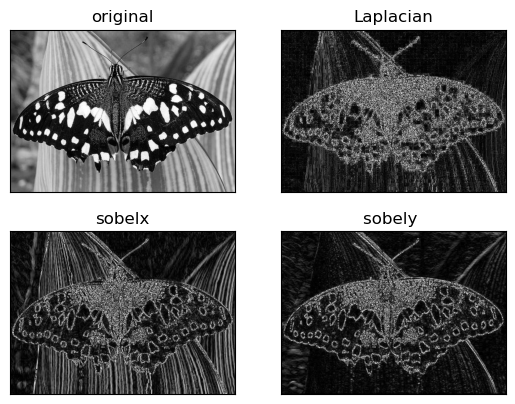

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('butterfly.jpg',0)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


lap = cv2.Laplacian(img, cv2.CV_64F, ksize=3)
lap = np.uint8(np.absolute(lap))

sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobelx = np.uint8(np.absolute(sobelx))
sobely = np.uint8(np.absolute(sobely))

titles = ['original', 'Laplacian', 'sobelx', 'sobely ']
images = [img, lap, sobelx, sobely]

for i in range(0,len(images)):
    plt.subplot(2,2, i+1)
    plt.xticks([])   
    plt.yticks([])
    plt.imshow(images[i])
    plt.title(titles[i])

plt.show()


# Contour detections

In [4]:
import cv2
import numpy as np

img = cv2.imread('face.jpg')
black = np.zeros((318, 336, 3),np.uint8)

#print(img.shape)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

_, thresh = cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)  #cv2.CHAIN_APPROX_NONE it takes all points from edges of contour, if simple means takes only 4 points

cv2.drawContours(black, contours, -1, (0,255,0),1)

cv2.imshow('Contour', black)
cv2.imshow('Thresh', thresh)
cv2.imshow('Original', img)
    
cv2.waitKey(0)
cv2.destroyAllWindows()

